In [1]:
from textacy.extract import subject_verb_object_triples
from matplotlib import pylab as plt
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_lg')

/home/vatsal/Applications/miniconda3/envs/bertopic/lib/python3.7/site-packages/spacy/util.py:865: UserWarning: [W095] Model 'en_core_web_lg' (2.3.1) was trained with spaCy v2.3 and may not be 100% compatible with the current version (3.4.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


OSError: [E053] Could not read config file from /home/vatsal/Applications/miniconda3/envs/bertopic/lib/python3.7/site-packages/en_core_web_lg/en_core_web_lg-2.3.1/config.cfg

In [ ]:
text ="France , officially the French Republic (French: République française)[1] is a transcontinental"\
"country spanning Western Europe and overseas regions and territories in South America and the Atlantic,"\
"Pacific and Indian Oceans.[XIII] Including all of its territories,"\
"France has twelve time zones, the most of any country."\
"Its metropolitan area extends from the Rhine to the Atlantic Ocean and from the Mediterranean Sea"\
"to the English Channel and the North Sea; overseas territories include French Guiana in South America,"\
" Saint Pierre and Miquelon in North Atlantic, French West Indies and several islands in Oceania and Indian Ocean."\
" Due to its several coastal territories, France has the largest exclusive economic zone in the world."\
" France borders Belgium, Luxembourg, Germany, Switzerland, Monaco, Italy, Andorra and Spain in Europe,"\
" as well as the Netherlands, Suriname and Brazil in the Americas. "\
"Its eighteen integral regions (five of which are overseas) span a combined area of 643,801 km2"\
"(248,573 sq mi) and over 67 million people (as of May 2021)."\
" France is a unitary semi-presidential republic with its capital in Paris, the" \
"country's largest city and main cultural and commercial centre; "\
"other major urban areas include Lyon, Marseille, Toulouse, Bordeaux, Lille and Nice."

In [ ]:

document = nlp(text)

sentences_in_doc = list(document.sents)
for sentence in sentences_in_doc:
    print (sentence)


France , officially the French Republic (French: République française)[1] is a transcontinentalcountry spanning Western Europe and overseas regions and territories in South America and the Atlantic,Pacific and Indian Oceans.[XIII] Including all of its territories,France has twelve time zones, the most of any country.
Its metropolitan area extends from the Rhine to the Atlantic Ocean and from the Mediterranean Seato the English Channel and the North Sea; overseas territories include French Guiana in South America, Saint Pierre and Miquelon in North Atlantic, French West Indies and several islands in Oceania and Indian Ocean.
Due to its several coastal territories, France has the largest exclusive economic zone in the world.
France borders Belgium, Luxembourg, Germany, Switzerland, Monaco, Italy, Andorra and Spain in Europe, as well as the Netherlands, Suriname and Brazil in the Americas.
Its eighteen integral regions (five of which are overseas) span a combined area of 643,801 km2(248,5

In [ ]:

from tqdm import tqdm

In [ ]:
triples_raw = []

for i in tqdm(sentences_in_doc):  
    iterator = subject_verb_object_triples(i)
    phrase_triples = []
    for svo in iterator:
        phrase_triples.append(svo)
    triples_raw.append(phrase_triples)

100%|██████████| 6/6 [00:00<00:00, 5510.36it/s]


In [ ]:
from itertools import chain
triples_final = list(chain.from_iterable(triples_raw))

In [ ]:
triples_raw

[[(France, has, time zones)],
 [(territories, include, Guiana),
  (territories, include, Indies),
  (territories, include, islands)],
 [(France, has, zone)],
 [(France, borders, Belgium),
  (France, borders, Luxembourg),
  (France, borders, Germany),
  (France, borders, Switzerland),
  (France, borders, Monaco),
  (France, borders, Italy),
  (France, borders, Andorra),
  (France, borders, Spain)],
 [(regions, span, area)],
 [(areas, include, Lyon),
  (areas, include, Marseille),
  (areas, include, Toulouse),
  (areas, include, Bordeaux),
  (areas, include, Lille),
  (areas, include, Nice)]]

In [ ]:
sources = []
relations = []
targets = []


In [ ]:
for ep_item in triples_final:
    # check found items are not empty
    
    if ep_item:
        print(ep_item)
        # append source/relation/target
        sources.append(ep_item[0])
        relations.append(ep_item[1])
        targets.append(ep_item[2])
    
    #else:
     #   print('Could not detect triples in phrase:', phrase)

(France, has, time zones)
(territories, include, Guiana)
(territories, include, Indies)
(territories, include, islands)
(France, has, zone)
(France, borders, Belgium)
(France, borders, Luxembourg)
(France, borders, Germany)
(France, borders, Switzerland)
(France, borders, Monaco)
(France, borders, Italy)
(France, borders, Andorra)
(France, borders, Spain)
(regions, span, area)
(areas, include, Lyon)
(areas, include, Marseille)
(areas, include, Toulouse)
(areas, include, Bordeaux)
(areas, include, Lille)
(areas, include, Nice)


In [ ]:
# create DataFrame
kg_df = pd.DataFrame({'source': sources, 'target': targets, 'edge': relations})

In [ ]:
kg_df

,source,target,edge
0,(France),"(time, zones)",(has)
1,(territories),(Guiana),(include)
2,(territories),(Indies),(include)
3,(territories),(islands),(include)
4,(France),(zone),(has)
5,(France),(Belgium),(borders)
6,(France),(Luxembourg),(borders)
7,(France),(Germany),(borders)
8,(France),(Switzerland),(borders)
9,(France),(Monaco),(borders)


In [ ]:
import networkx as nx


In [ ]:
G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

In [ ]:

nx_SG_d1 = nx.dfs_tree(G)
edge_labels = nx.get_edge_attributes(G,'edge')

In [ ]:
edge_labels

{(France, time zones, 0): has,
 (territories, Guiana, 0): include,
 (territories, Indies, 0): include,
 (territories, islands, 0): include,
 (France, zone, 0): has,
 (France, Belgium, 0): borders,
 (France, Luxembourg, 0): borders,
 (France, Germany, 0): borders,
 (France, Switzerland, 0): borders,
 (France, Monaco, 0): borders,
 (France, Italy, 0): borders,
 (France, Andorra, 0): borders,
 (France, Spain, 0): borders,
 (regions, area, 0): span,
 (areas, Lyon, 0): include,
 (areas, Marseille, 0): include,
 (areas, Toulouse, 0): include,
 (areas, Bordeaux, 0): include,
 (areas, Lille, 0): include,
 (areas, Nice, 0): include}

In [ ]:

def plot_graph(graph): 
    plt.figure(figsize=(8,8))
    pos = nx.spring_layout(graph, k=0.5)  # k regulates the distance between nodes
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=800, edge_cmap=plt.cm.Blues, pos=pos)
    plt.show()

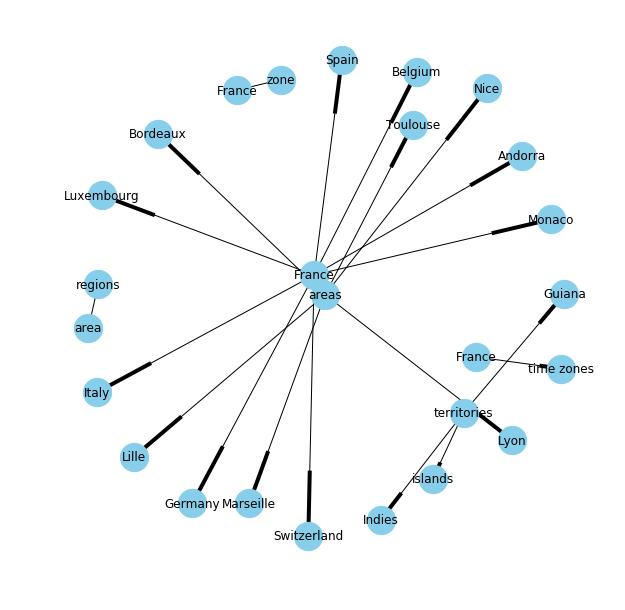

In [ ]:
plot_graph(nx_SG_d1)